In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [7]:
iris = pd.read_csv("iris.csv")
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Observation
- The target column("Variety") is still object type.It needs to be  converted to numeric(int)

In [11]:
iris[iris.duplicated(keep = False)]

,sepal.length,sepal.width,petal.length,petal.width,variety
101,5.8,2.7,5.1,1.9,Virginica
142,5.8,2.7,5.1,1.9,Virginica


In [17]:
labelencoder = LabelEncoder()
iris.iloc[:,-1] = labelencoder.fit_transform(iris.iloc[:,-1])
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
iris['variety'] = pd.to_numeric(labelencoder.fit_transform(iris['variety']))
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [22]:
iris.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [37]:
X=iris.iloc[:,0:4]
Y=iris['variety']
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int32

In [95]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)
x_train


,sepal.length,sepal.width,petal.length,petal.width
30,4.8,3.1,1.6,0.2
37,4.9,3.6,1.4,0.1
115,6.4,3.2,5.3,2.3
136,6.3,3.4,5.6,2.4
135,7.7,3.0,6.1,2.3
...,...,...,...,...
73,6.1,2.8,4.7,1.2
10,5.4,3.7,1.5,0.2
60,5.0,2.0,3.5,1.0
28,5.2,3.4,1.4,0.2


In [97]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=None)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4, 0.9, 'x[3] <= 0.8\nentropy = 1.584\nsamples = 105\nvalue = [36, 36, 33]'),
 Text(0.2, 0.7, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.6, 0.7, 'x[3] <= 1.7\nentropy = 0.999\nsamples = 69\nvalue = [0, 36, 33]'),
 Text(0.5, 0.8, '  False'),
 Text(0.4, 0.5, 'x[2] <= 5.0\nentropy = 0.297\nsamples = 38\nvalue = [0, 36, 2]'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.6, 0.3, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

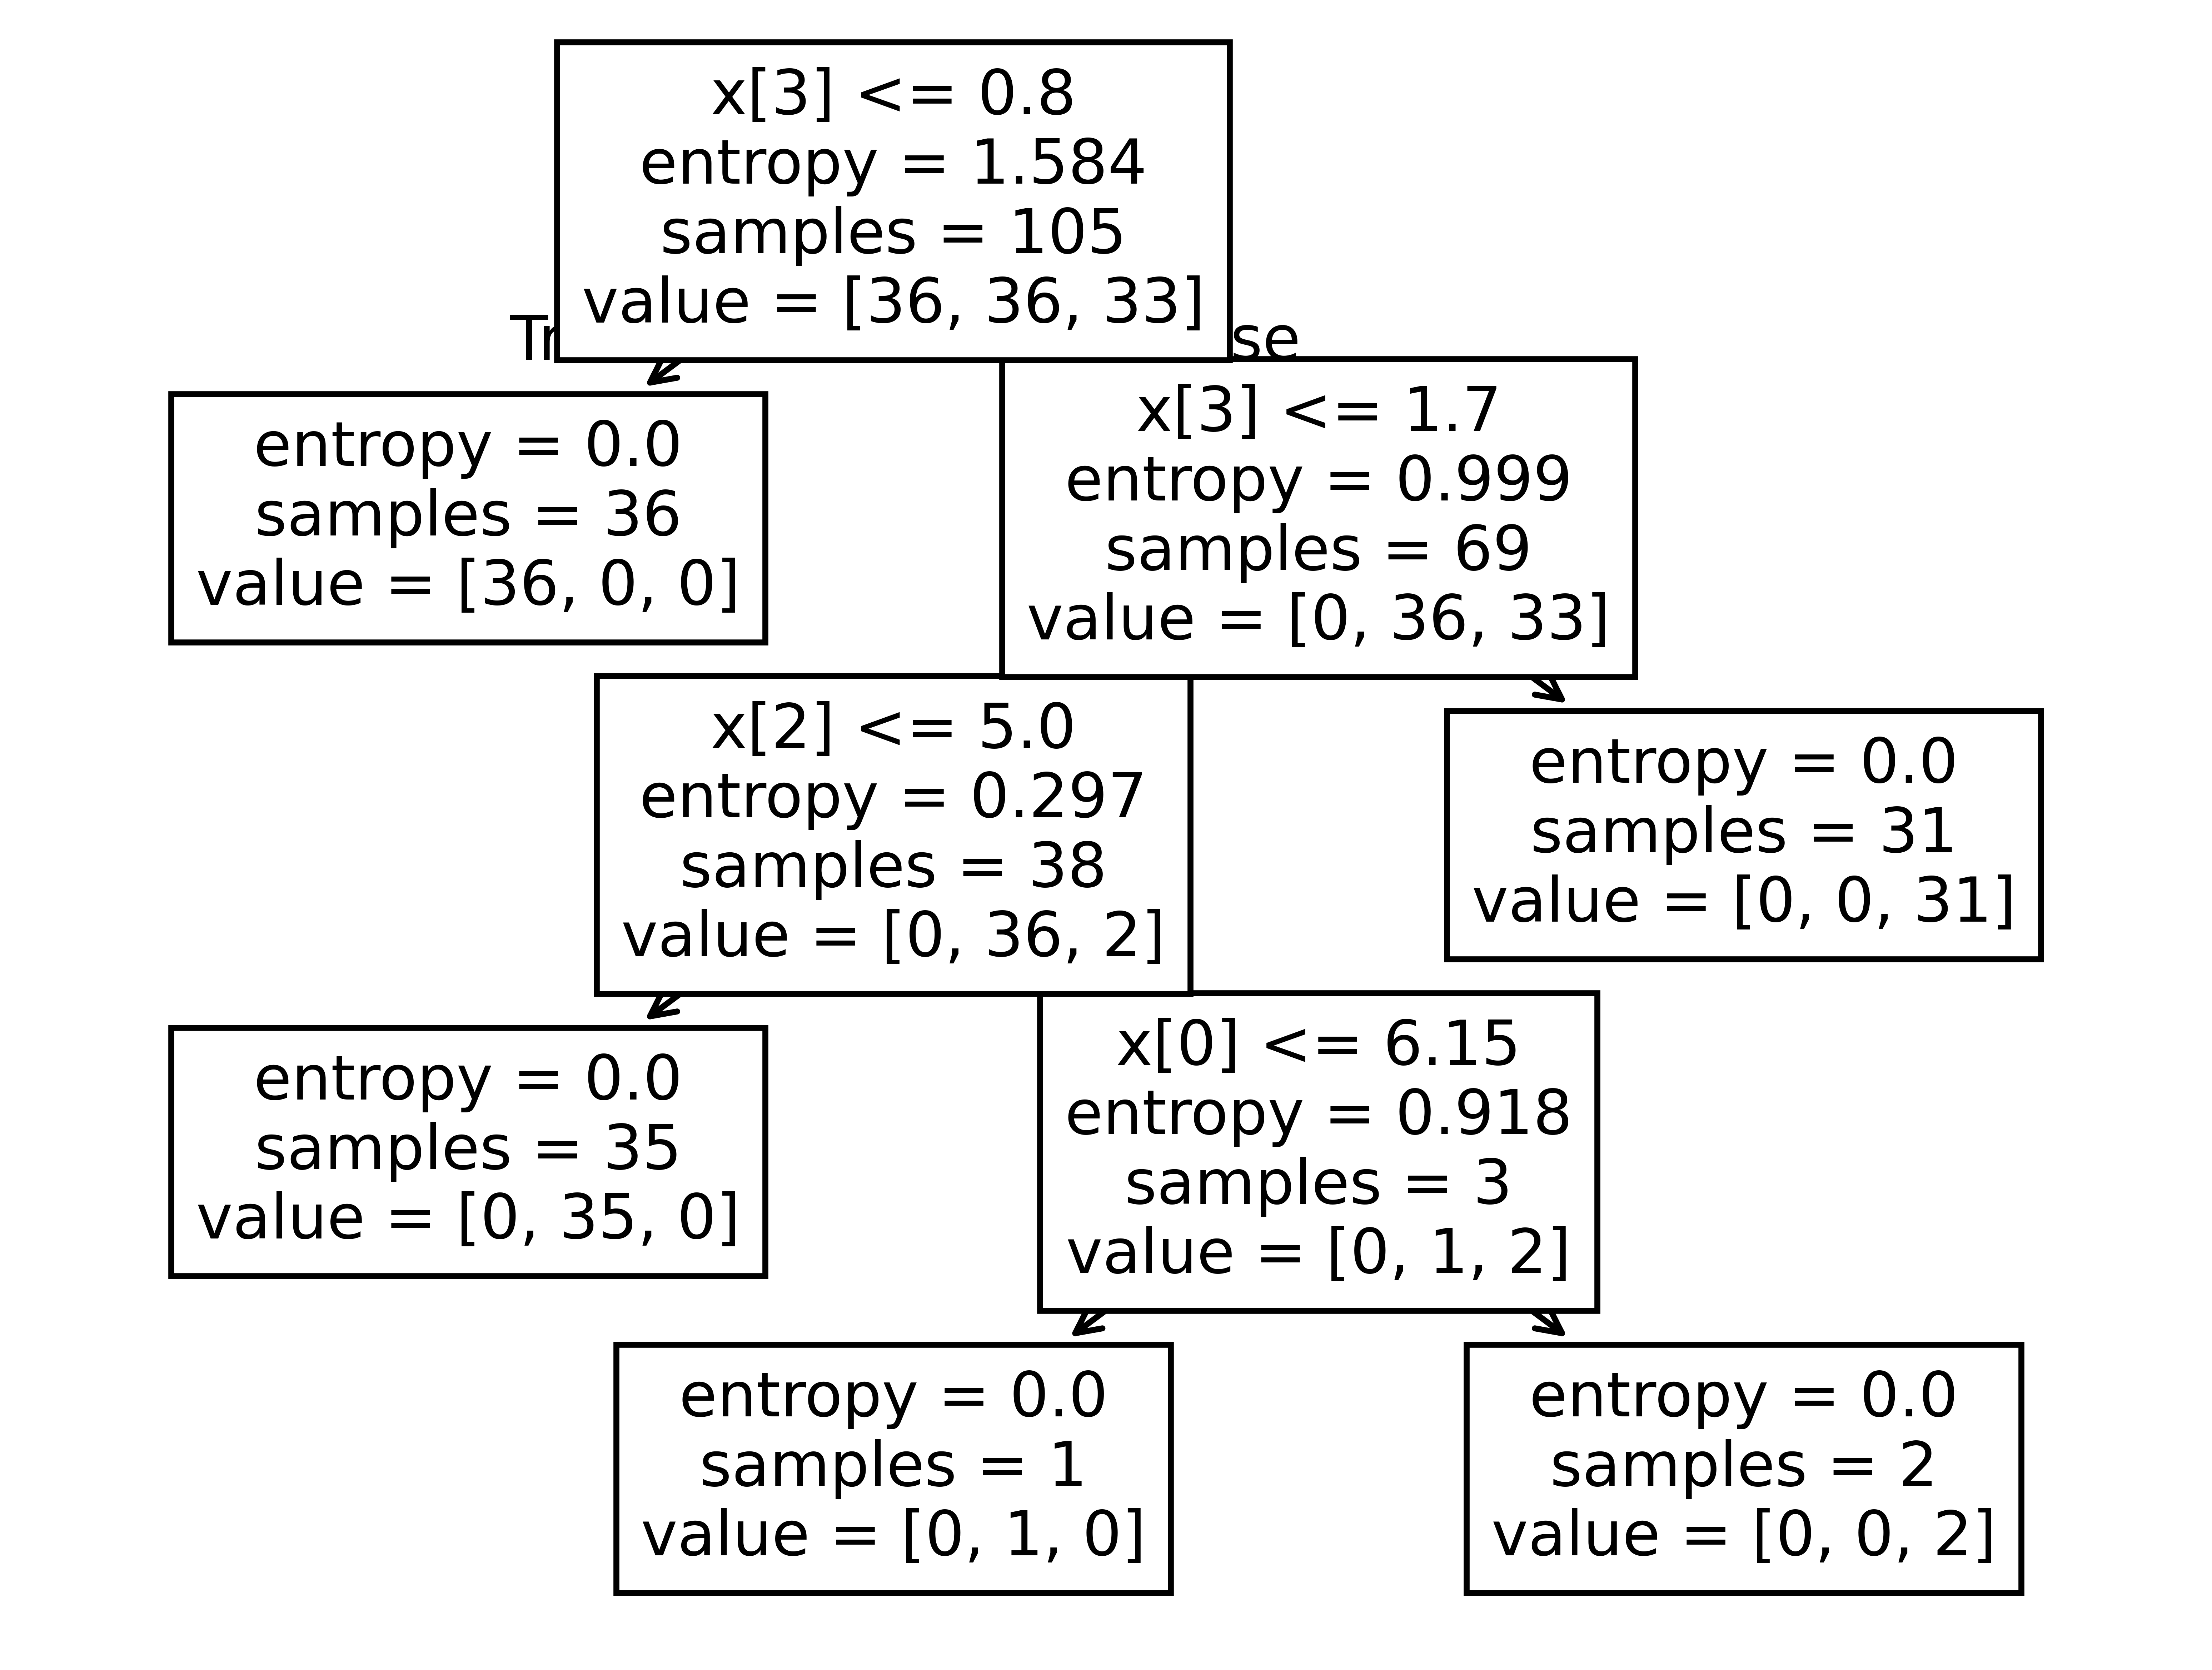

In [99]:
plt.figure(dpi=1200)
tree.plot_tree(model)